In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
import numpy as np

In [ ]:
x_train = np.asarray(x_train).astype('float64')
x_test = np.asarray(x_test).astype('float64')

In [ ]:
from keras import layers, models

In [ ]:
def get_network(): 
  network = models.Sequential()
  network.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
  network.add(layers.MaxPooling2D((2, 2)))
  network.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
  network.add(layers.MaxPooling2D((2, 2)))
  network.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
  network.add(layers.MaxPooling2D((2, 2)))
  network.add(layers.Flatten())
  network.add(layers.Dense(64, activation = 'relu', input_shape = (28 * 28, 1)))
  network.add(layers.Dense(128, activation = 'relu'))
  network.add(layers.Dense(10, activation = 'sigmoid'))

  return network

In [ ]:
import matplotlib.pyplot as plt

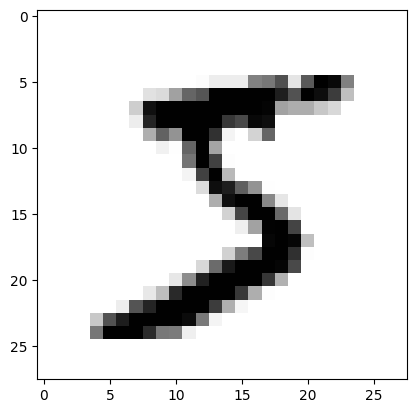

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [ ]:
network = get_network()

In [ ]:
network.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
his = network.fit(x_train, y_train, batch_size = 64, epochs = 5, validation_split = 0.2)

Epoch 1/5
750/750 [==============================] - 52s 67ms/step - loss: 0.3683 - acc: 0.8997 - val_loss: 0.0933 - val_acc: 0.9715
Epoch 2/5
750/750 [==============================] - 49s 65ms/step - loss: 0.0905 - acc: 0.9746 - val_loss: 0.0779 - val_acc: 0.9771
Epoch 3/5
750/750 [==============================] - 48s 63ms/step - loss: 0.0664 - acc: 0.9799 - val_loss: 0.0679 - val_acc: 0.9813
Epoch 4/5
750/750 [==============================] - 49s 66ms/step - loss: 0.0538 - acc: 0.9845 - val_loss: 0.0867 - val_acc: 0.9805
Epoch 5/5
750/750 [==============================] - 46s 61ms/step - loss: 0.0458 - acc: 0.9876 - val_loss: 0.0744 - val_acc: 0.9819


In [ ]:
hist_dist = his.history

In [ ]:
hist_dist

{'loss': [0.4731665849685669,
  0.10348927974700928,
  0.07685567438602448,
  0.06258872151374817,
  0.052262406796216965],
 'acc': [0.8891666531562805,
  0.9698333144187927,
  0.9770416617393494,
  0.9824791550636292,
  0.9851458072662354],
 'val_loss': [0.10437217354774475,
  0.10513930022716522,
  0.06544183194637299,
  0.06320328265428543,
  0.07020904868841171],
 'val_acc': [0.969083309173584,
  0.9733333587646484,
  0.9825000166893005,
  0.9836666584014893,
  0.9852499961853027]}

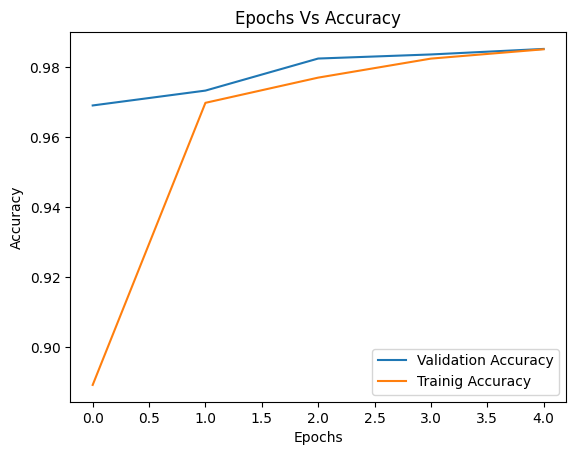

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(range(len(hist_dist['val_acc'])), hist_dist['val_acc'], label = 'Validation Accuracy')
plt.plot(range(len(hist_dist['acc'])), hist_dist['acc'], label = 'Trainig Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs Vs Accuracy")
plt.legend()
plt.show()

In [ ]:
x_train[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
res = network.predict(x_test)

313/313 [==============================] - 3s 11ms/step


In [ ]:
res

array([[3.7544652e-09, 4.9821194e-04, 4.3546348e-05, ..., 9.9998558e-01,
        9.1563201e-09, 2.4961198e-08],
       [2.5977241e-11, 3.5320491e-09, 9.9999994e-01, ..., 2.5209616e-08,
        1.4518197e-08, 2.6269980e-14],
       [3.1284307e-07, 9.9997622e-01, 2.0478612e-07, ..., 2.7983790e-05,
        5.7463649e-06, 9.2455792e-08],
       ...,
       [9.2792341e-08, 5.4905075e-07, 4.2010098e-09, ..., 1.9262311e-07,
        3.1581854e-07, 5.6546005e-06],
       [1.3722247e-06, 1.1708967e-08, 4.4791157e-08, ..., 4.1071993e-10,
        1.3111718e-06, 1.2758839e-07],
       [4.6041656e-05, 1.0297800e-06, 1.1589712e-05, ..., 2.2862055e-10,
        6.6209948e-03, 2.5147767e-07]], dtype=float32)

In [ ]:
target_res = np.argmax(res[0])

In [ ]:
target_res

7

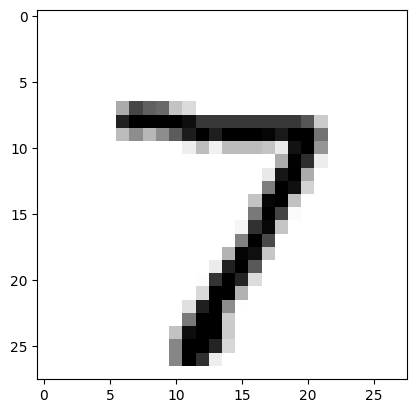

In [ ]:
plt.imshow(x_test[0], cmap = plt.cm.binary)